<a href="https://colab.research.google.com/github/adamcardoso/data-analysis-project-World-Happiness-Report-Up-to-2023/blob/main/WorldHappinessReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

World Happiness Report Up to 2023

Word Happiness Trends: An Extensive Dataset with Scores and Factors **negrito**

https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors?select=WHR_2023.csv

**Imports**

In [2]:
## Data handling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

## Missing values visualization
import missingno as ms

## Warnings
import warnings
warnings.filterwarnings('ignore')

**Loading data**

In [14]:
data = pd.read_csv('WHR_2023.csv', sep=',', encoding="cp1252")

data.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [15]:
## Data set size
print(f'The data set have {data.shape[0]} rows and {data.shape[1]} columns')

The data set have 137 rows and 9 columns


In [16]:
## Data set information
print("**"*30)
print(" "*19, "Data set Information")
print("**"*30)
print(data.info())

************************************************************
                    Data set Information
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB
None


**Data Cleaning**

In [17]:
## Checking duplicate rows
print(f'There are {data.duplicated().sum()} duplicate rows')

There are 0 duplicate rows


In [18]:
# remove null values
data.dropna(inplace = True)

In [19]:
# We verify that null values ​​are no longer present
data.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

**EDA**

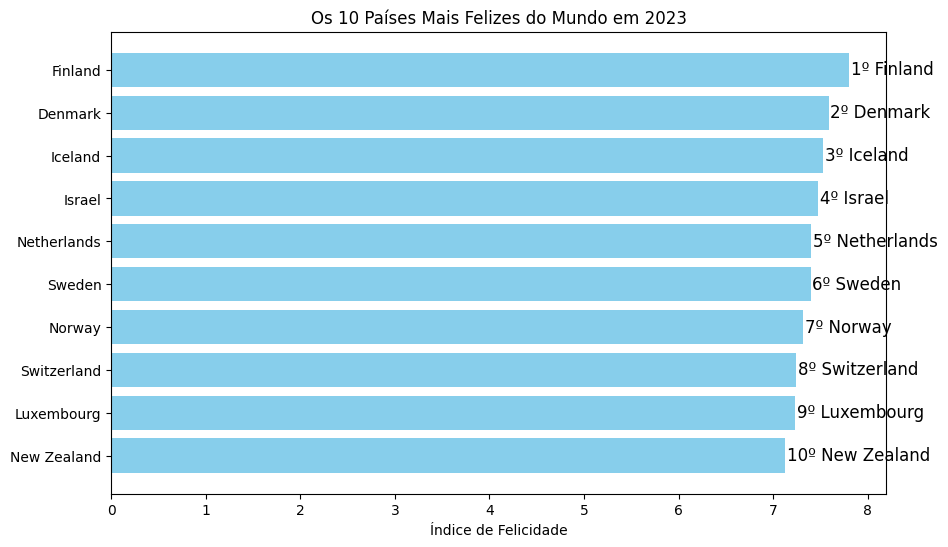

In [24]:
# Ordene os dados pelo índice de felicidade (happiness_score) em ordem decrescente
top_10_happiest = data.sort_values(by='happiness_score', ascending=False).head(10)

# Adicione a coluna de ranking
top_10_happiest['ranking'] = range(1, 11)  # Começa do 1 e vai até 10

# Crie um gráfico de barras com os 10 países mais felizes e seus rankings
plt.figure(figsize=(10, 6))
plt.barh(top_10_happiest['country'], top_10_happiest['happiness_score'], color='skyblue')
plt.xlabel('Índice de Felicidade')
plt.title('Os 10 Países Mais Felizes do Mundo em 2023')
plt.gca().invert_yaxis()  # Inverter o eixo y para que o país mais feliz fique no topo

# Adicione os números de classificação ao lado dos nomes dos países
for i, (country, score, ranking) in enumerate(zip(top_10_happiest['country'], top_10_happiest['happiness_score'], top_10_happiest['ranking'])):
    plt.text(score + 0.02, i, f'{ranking}º {country}', va='center', fontsize=12)

# Mostrar o gráfico
plt.show()

**Análise regional**

In [25]:
# Agrupamos os dados por região
regional_data = data.groupby('region')

**Calcular Estatísticas Descritivas**

In [26]:
# Exemplo: calcular a média do índice de felicidade para cada região
mean_happiness_by_region = regional_data['happiness_score'].mean()

**Visualizações Gráficas**

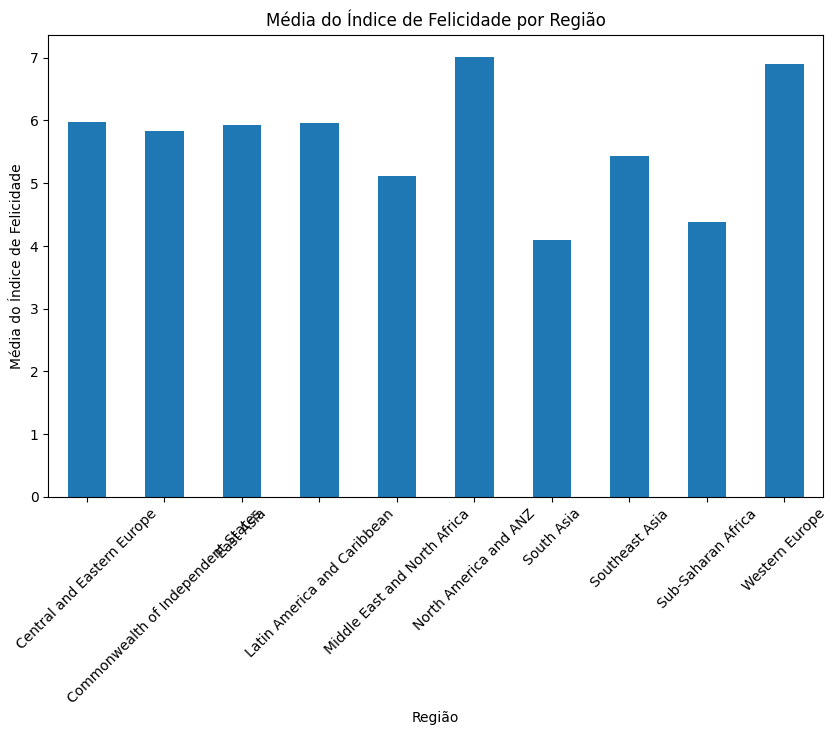

In [27]:
# Exemplo: gráfico de barras da média de felicidade por região
mean_happiness_by_region.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Região')
plt.ylabel('Média do Índice de Felicidade')
plt.title('Média do Índice de Felicidade por Região')
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
plt.show()

**Cálculo de correlação**

In [28]:
# Selecione as variáveis de interesse
variables = ['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
correlation_matrix = data[variables].corr()

# Visualize a matriz de correlação
print(correlation_matrix)

                              happiness_score  gdp_per_capita  social_support  \
happiness_score                      1.000000        0.783811        0.838161   
gdp_per_capita                       0.783811        1.000000        0.741715   
social_support                       0.838161        0.741715        1.000000   
healthy_life_expectancy              0.746699        0.837518        0.725334   
freedom_to_make_life_choices         0.661944        0.449433        0.546545   
generosity                           0.039395       -0.162667        0.039753   
perceptions_of_corruption            0.470568        0.435398        0.275316   

                              healthy_life_expectancy  \
happiness_score                              0.746699   
gdp_per_capita                               0.837518   
social_support                               0.725334   
healthy_life_expectancy                      1.000000   
freedom_to_make_life_choices                 0.414965   
generosit

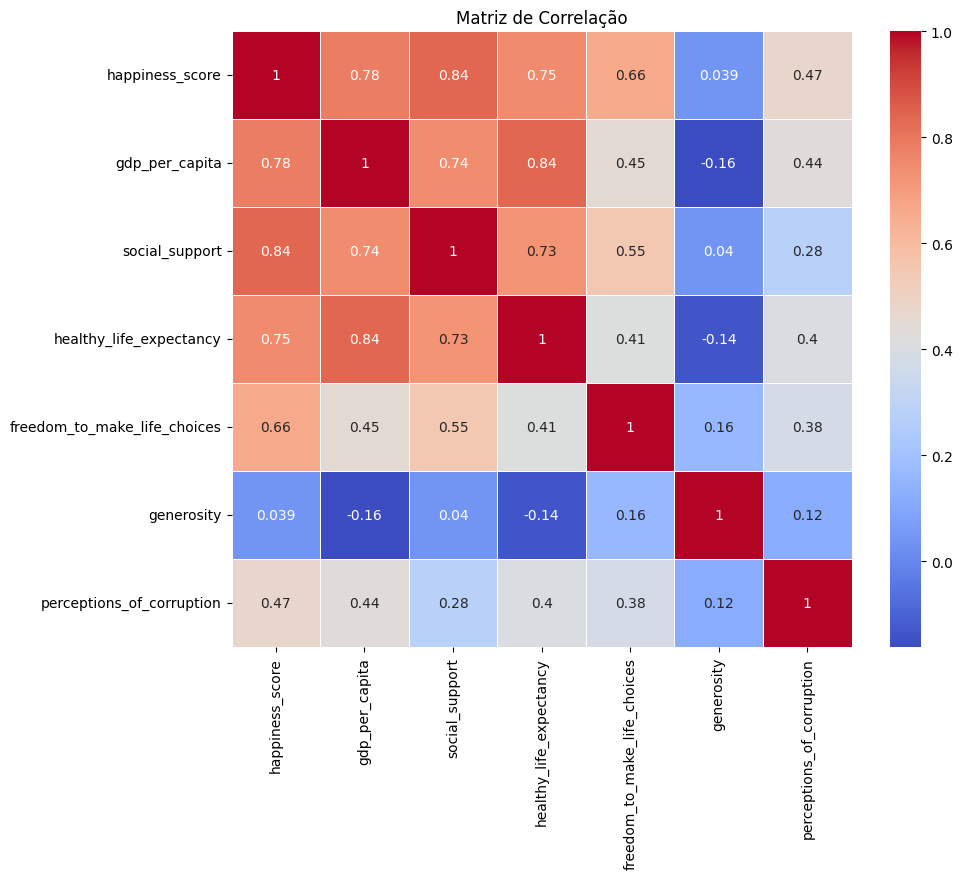

In [32]:
# Defina as variáveis
variables = ['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']

# Crie a matriz de correlação
correlation_matrix = data[variables].corr()

# Configure o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Crie o mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Adicione um título ao gráfico
plt.title('Matriz de Correlação')

# Exiba o gráfico
plt.show()

**Análise de Outliers**

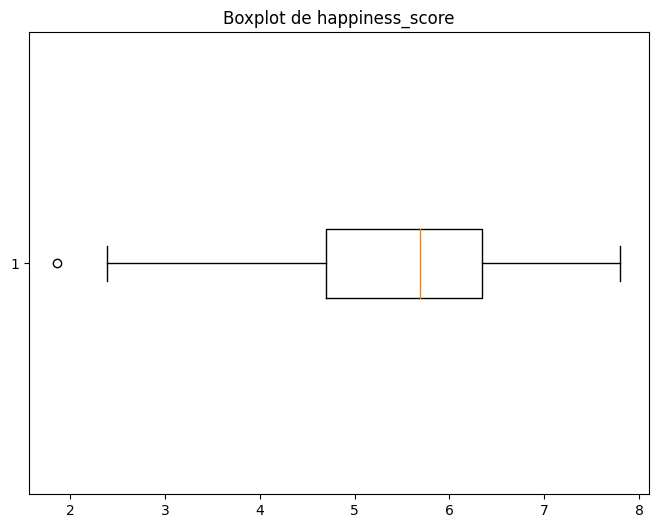

In [29]:
# Escolha a variável de interesse (por exemplo, índice de felicidade)
variable = 'happiness_score'

# Crie um boxplot para a variável
plt.figure(figsize=(8, 6))
plt.boxplot(data[variable], vert=False)
plt.title(f'Boxplot de {variable}')
plt.show()

**Análise de Cluster**

In [30]:
from sklearn.cluster import KMeans

# Escolha as variáveis para a análise de cluster
features = ['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy']

# Crie um dataframe apenas com as variáveis selecionadas
X = data[features]

# Escolha o número de clusters
n_clusters = 3

# Aplique o K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

# Adicione os rótulos de cluster ao dataframe original
data['cluster'] = kmeans.labels_

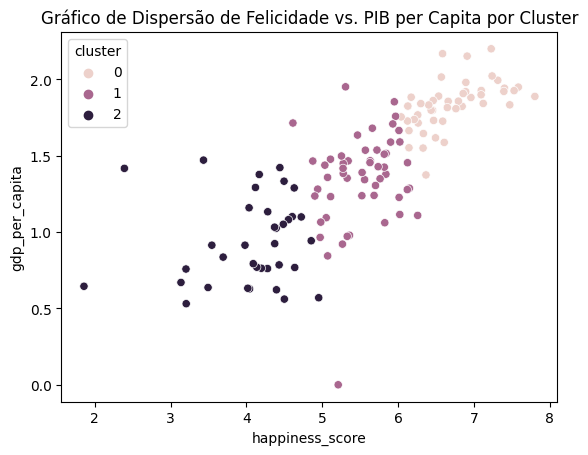

In [31]:
# Gráfico de dispersão de felicidade vs. PIB per capita colorido por cluster
sns.scatterplot(data=data, x='happiness_score', y='gdp_per_capita', hue='cluster')
plt.title('Gráfico de Dispersão de Felicidade vs. PIB per Capita por Cluster')
plt.show()